In [8]:
#Setting up the working directory
os.chdir("E:/Dataset")
print(os.getcwd())

E:\Dataset


In [5]:
import os #for i/p o/p operations
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Machine Learning algorithm
from sklearn.linear_model import LinearRegression

# For splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [26]:
# Loading the data
train  = pd.read_csv("train_cab_fare.csv",na_values={"pickup_datetime":"43"})
test =pd.read_csv("test_cab_fare.csv")

In [13]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [14]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


Data Understanding

In [15]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [16]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [17]:
test.shape

(9914, 6)

In [18]:
 train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [19]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [20]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Data cleansing and missing value analaysis

In [22]:
# Convert fare_amount from object to numeric
# Using errors=’coerce’. It will replace all non-numeric values with NaN

train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [23]:
# Dropping NA values in datetime column

train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [27]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime

train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [28]:
# We will saperate the Pickup_datetime column into separate field like year,month,day of the week

train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [29]:
# Rechecking data types after conversion
train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [51]:
# Convert fare_amount from object to numeric
# Using errors=’coerce’. It will replace all non-numeric values with NaN

train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [52]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [30]:
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

In [31]:
# We will saperate the Pickup_datetime column into separate field like year, month, day of the week

test['Year']=test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [32]:
# Re-checking test datatypes after conversion
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [33]:
# Removing pickup_datetime missing values rows

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())


(16066, 13)
0


In [34]:
# Checking passenger count variable

train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

observation

We can see maximum number of passanger count is 5345 which is actually not possible. So,reducing the passenger count to 6 (even if we consider the SUV.
We also need to remove passenger count having 0 value

### passenger_count variable

In [36]:
# Removing the passanger count having count>6

train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [37]:
# Removing the values with passenger count of 0
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [38]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [39]:
train["passenger_count"].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

we need to remove NaN values

In [40]:
# Removing passanger_count missing values rows

train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [41]:
# There is one passenger count value of 0.12 which is not possible. 
# Hence we will remove fractional passenger value
train=train.drop(train[train['passenger_count']==0.12].index, axis=0)

In [43]:
train.shape

(15933, 13)

In [44]:
train["passenger_count"]

0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
16061    1.0
16062    1.0
16063    2.0
16064    1.0
16065    1.0
Name: passenger_count, Length: 15933, dtype: float64

we can see passenger_count outliers are removed

### fare_amount variable

In [46]:
# Finding decending order of fare_amount to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)


12915     96
7810      95
39       9.8
7331     9.8
5968     9.7
        ... 
1712     NaN
2412     NaN
2458     NaN
8178     NaN
8226     NaN
Name: fare_amount, Length: 15933, dtype: object

In [48]:
# Removing the missing value rows

train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(15910, 13)

In [49]:
# fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)

12915      96
7810       95
39        9.8
7331      9.8
5968      9.7
         ... 
2780     0.01
10002       0
13032      -3
2039     -2.9
2486     -2.5
Name: fare_amount, Length: 15910, dtype: object

In [53]:
# Remove those fields which has -ve values
train=train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)

(15907, 13)


In [54]:
# Make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [55]:
# Remove the row where fare amount is zero
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(15905, 13)

In [56]:
# fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
7918         2.50
8603         2.50
15490        2.50
1427         1.14
1123          NaN
Name: fare_amount, Length: 15905, dtype: float64

In [57]:
# Removing the missing value rows

train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(15904, 13)

In [58]:
# Removing the outlier 54343 and 4343 which are far greater than 453

train=train.drop(train[train["fare_amount"]>453].index, axis=0)
train.shape

(15902, 13)

In [59]:
# fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [60]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

### pickup_latitude and pickup_longitude variable

In [61]:
# Lattitude----> (-90 to 90)
# Longitude----> (-180 to 180)

# We need to drop the rows having  pickup_lattitude and pickup_longitude out of the above mentioned range

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [62]:
# Dropping one row having the value >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [63]:
train['pickup_latitude'].sort_values(ascending=False)

3075     41.366138
4487     41.366138
14367    41.366138
6416     41.366138
9808     41.366138
           ...    
3827    -73.988467
4783    -73.991840
9548    -73.992947
10091   -74.006210
8443    -74.006893
Name: pickup_latitude, Length: 15901, dtype: float64

In [64]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


no values are out of range hence clean

In [65]:
train.shape

(15901, 13)

In [67]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [68]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


Now, we cleared both the dataset (train and test) which can be further used for data analysis.

### Calculating distance based on the given coordinates

In [80]:
# As we are given pickup_longitute and pickup_latitude values.So,we need to calculate the distance using the haversine formula.
# Haversine formula(the great circle distance between two points on the earth (specified in decimal degrees))

from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a..iloc[0]
    lat1=a.iloc[1]
    lon2=a.iloc[2]
    lat2=a.iloc[3]
    
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [83]:
train.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
count,15901.000000,15901,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.376864,2012-03-17 19:11:55.535249152,-72.474894,39.898732,-72.465150,39.899265,1.649726,2011.730709,6.264952,15.669832,3.034275,13.494309,29.655808,15.071717
min,1.140000,2009-01-01 01:31:49,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2010-08-06 19:07:00,-73.992145,40.734948,-73.991181,40.734716,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.215839
50%,8.500000,2012-03-17 01:10:00,-73.981693,40.752640,-73.980158,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.125955
75%,12.500000,2013-10-11 06:04:57,-73.966815,40.767382,-73.963643,40.768026,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.851353
max,453.000000,2015-06-30 22:42:39,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,8667.542104
std,10.815059,NaN,10.538777,6.186797,10.566703,6.186423,1.265870,1.866738,3.447255,8.684920,1.968691,6.521858,17.300109,311.742181


In [88]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:9: 

In [90]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [91]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\saeed\AppData\Local\Temp\ipykernel_18796\1621848408.py:9: 

In [92]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [93]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [94]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
Year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [95]:
# Finding decending order of distance to get to know whether the outliers are present or not.

train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

OBSERVATIONS

As we can see that top 23 values in the distance variables are very high.
It means more than 8000 Kms distance they have travelled.
Just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers.
We need to remove these values.

In [96]:
Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [97]:
Counter(test['distance']==0)

Counter({False: 9829, True: 85})

In [99]:
# We need to remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15447, 14)

In [100]:
# We need to remove the rows whose distance values is very high, which is more than 129kms.

train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15424, 14)

In [101]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


since, We have splitted the pickup_datetime variable into different varaibles like month, year, day etc. Now, we dont need to have that pickup_datetime variable. Hence we can drop that.

In [102]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1)

In [104]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [105]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['Year'] = train['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [106]:
train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [107]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)

In [108]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [109]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['Year'] = test['Year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [110]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

## DATA VISUALIZATION

<Axes: xlabel='passenger_count', ylabel='count'>

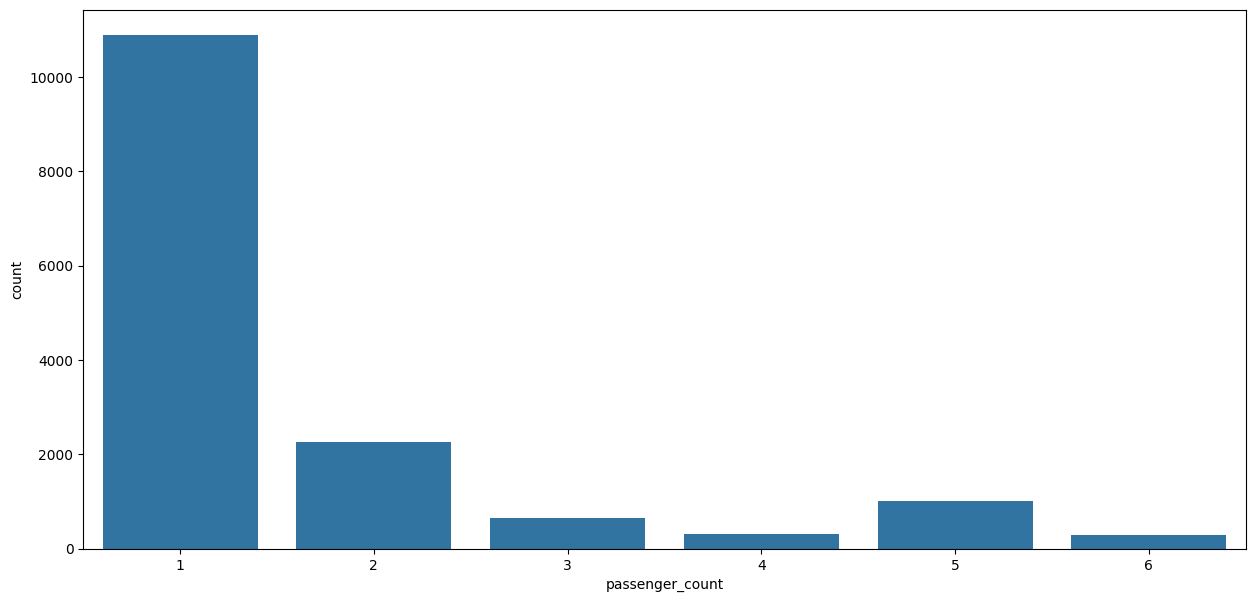

In [111]:
# Count plot on passenger count

plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

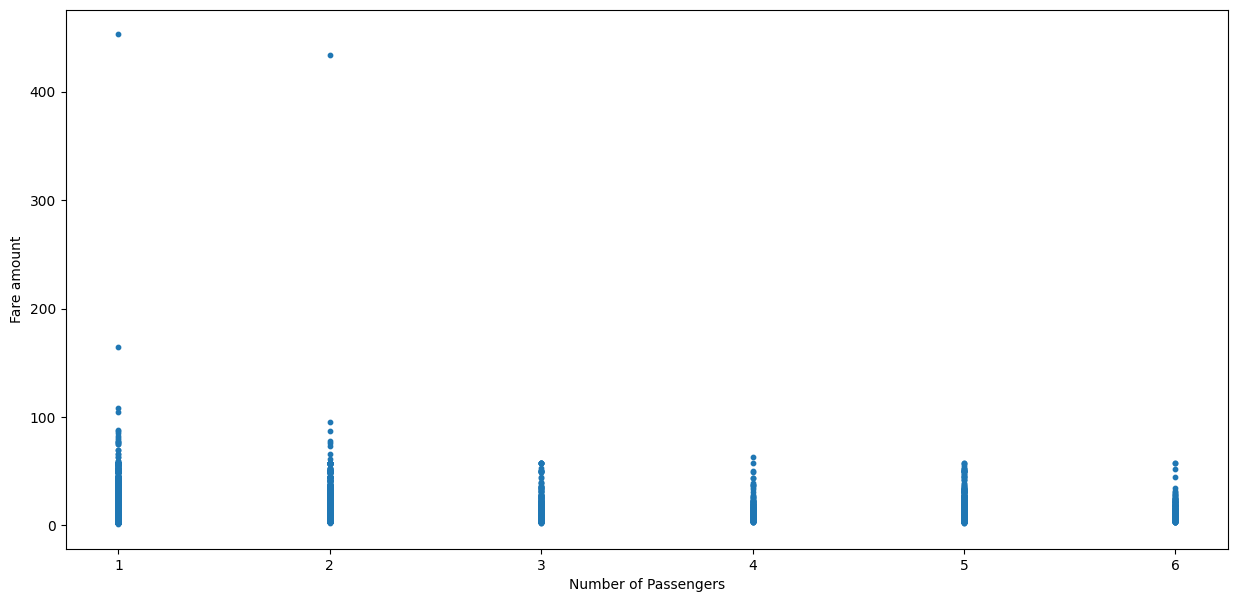

In [112]:
# Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

OBSERVATIONS

By seeing the above plots we can easily conclude that:

Single travelling passengers are most frequent travellers.
At the sametime, we can also conclude that highest Fare are coming from single & double travelling passengers.

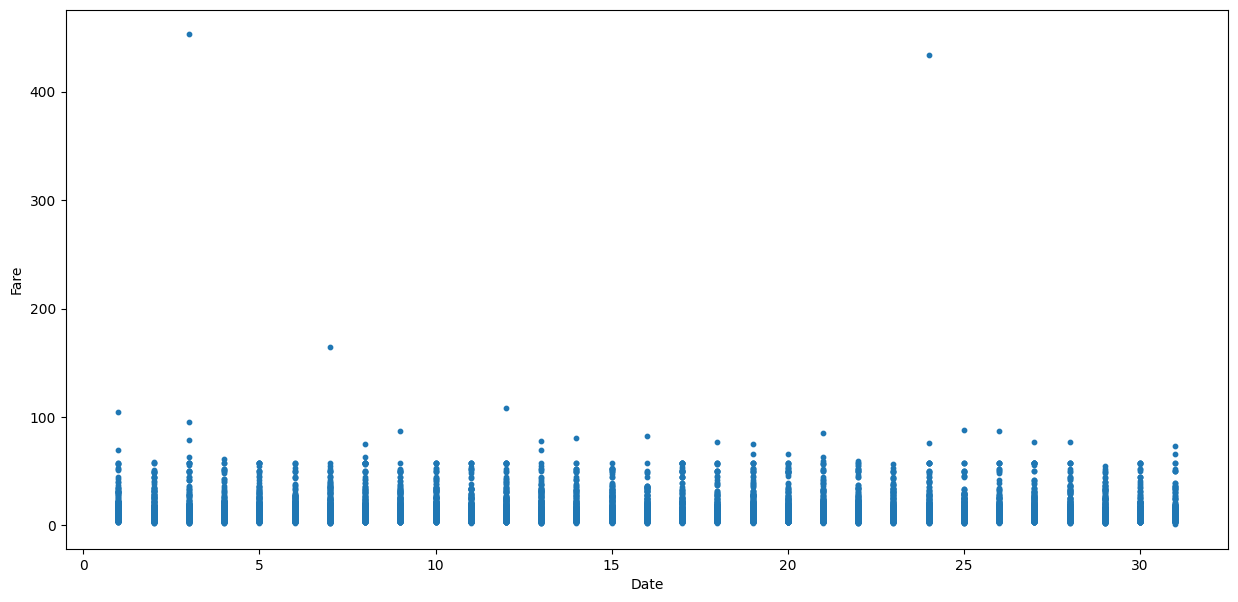

In [113]:
# Relationship between date and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

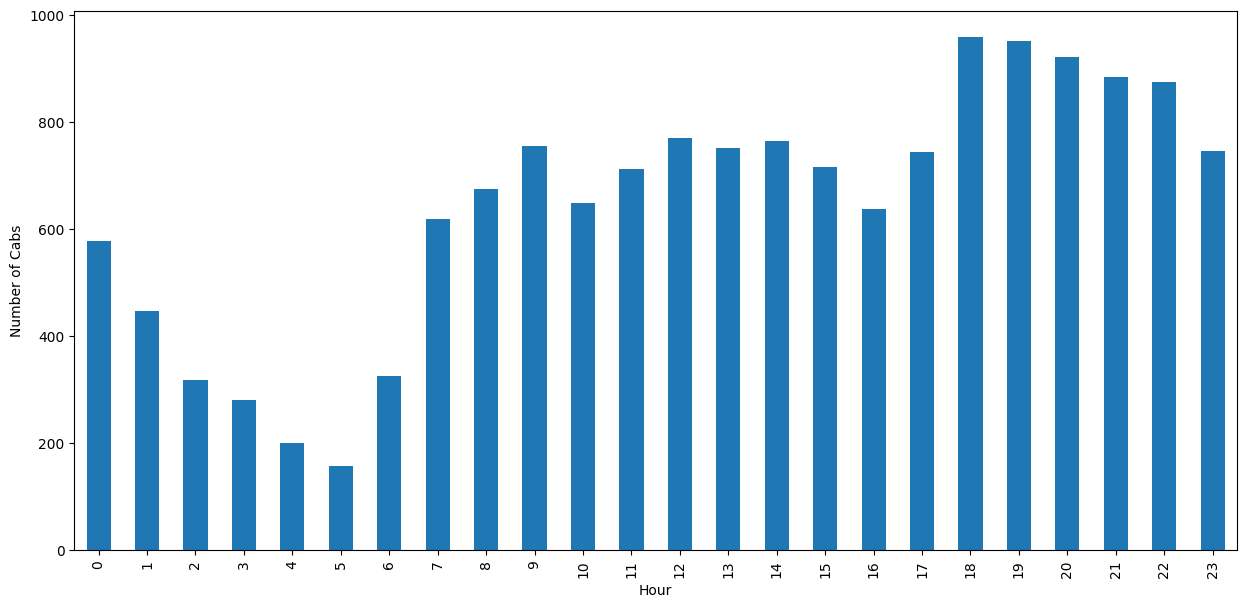

In [117]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.xlabel('Hour')
plt.ylabel('Number of Cabs')
plt.show()

OBSERVATIONS

Lowest cabs at 5 AM and highest at around 7 PM i.e the office rush hours.

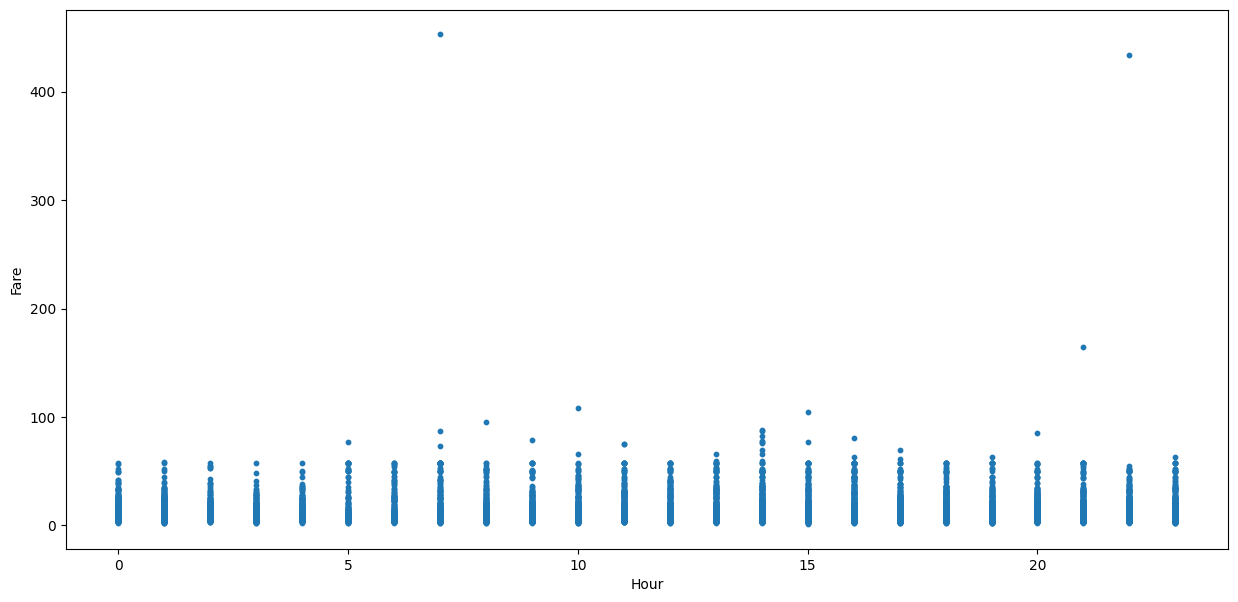

In [120]:
#Relationship between Time and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

- From the above plot, We can observe that the cabs taken at 7 am and 23(11 Pm) are the costliest.
- Hence we can assume that cabs taken early in morning and late at night are costliest

<Axes: xlabel='Day', ylabel='count'>

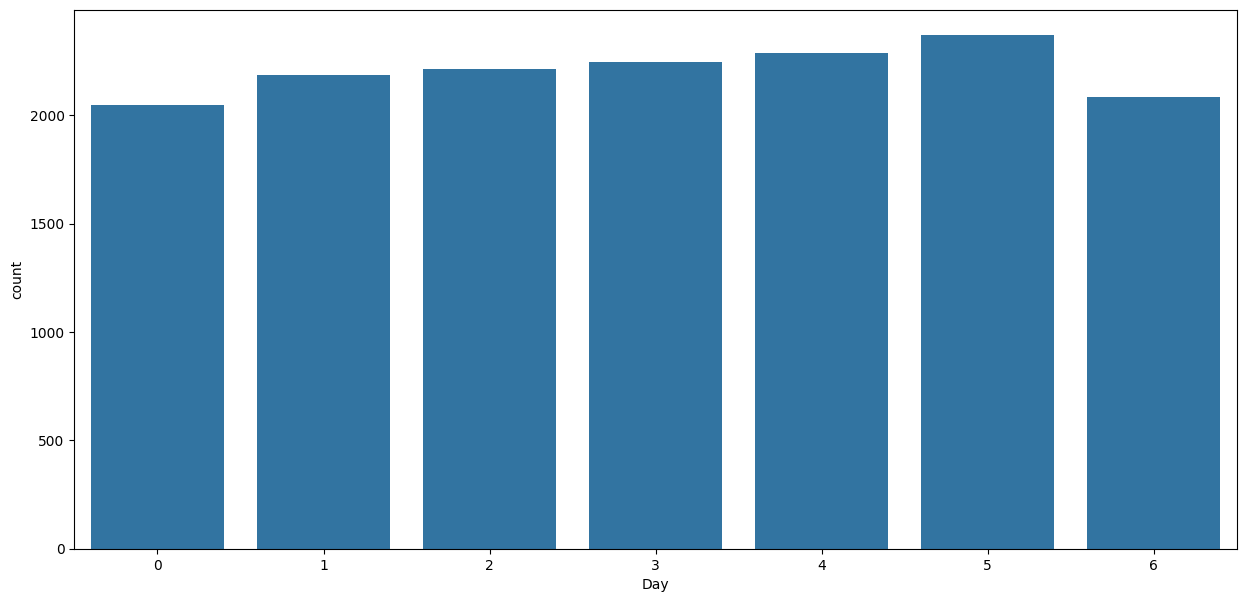

In [121]:
# Impact of Day on the number of cab rides

plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

OBSERVATIONS

The day of the week does not seem to have much influence on the number of cabs ride.

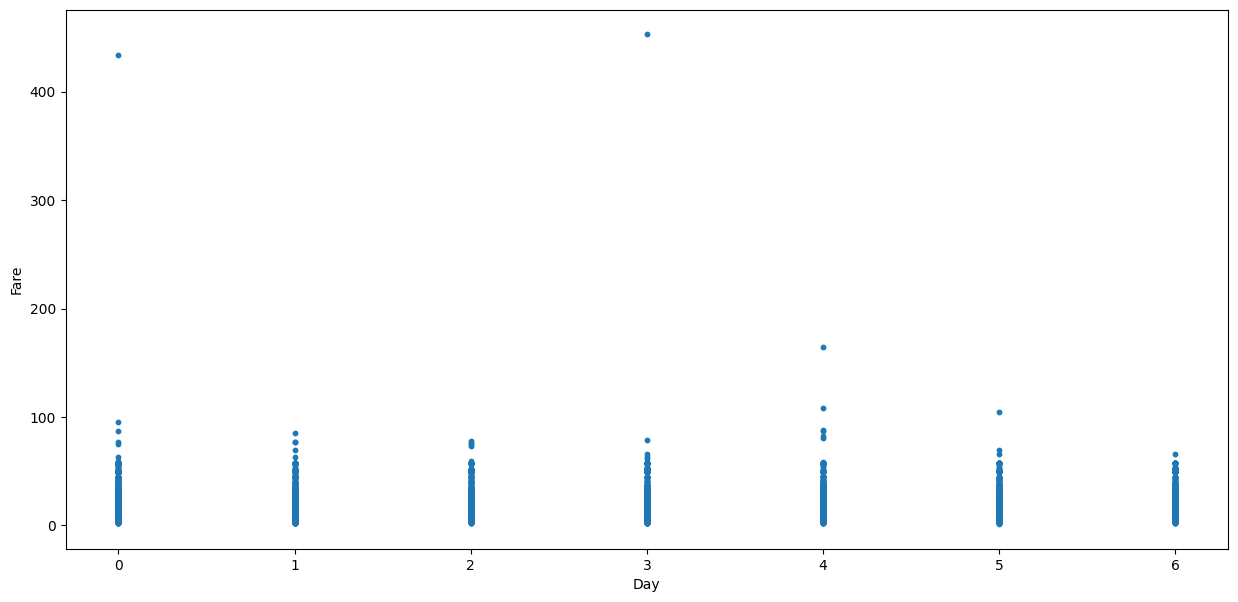

In [122]:
#Relationships between day and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

- The highest fare seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday.
- May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices.

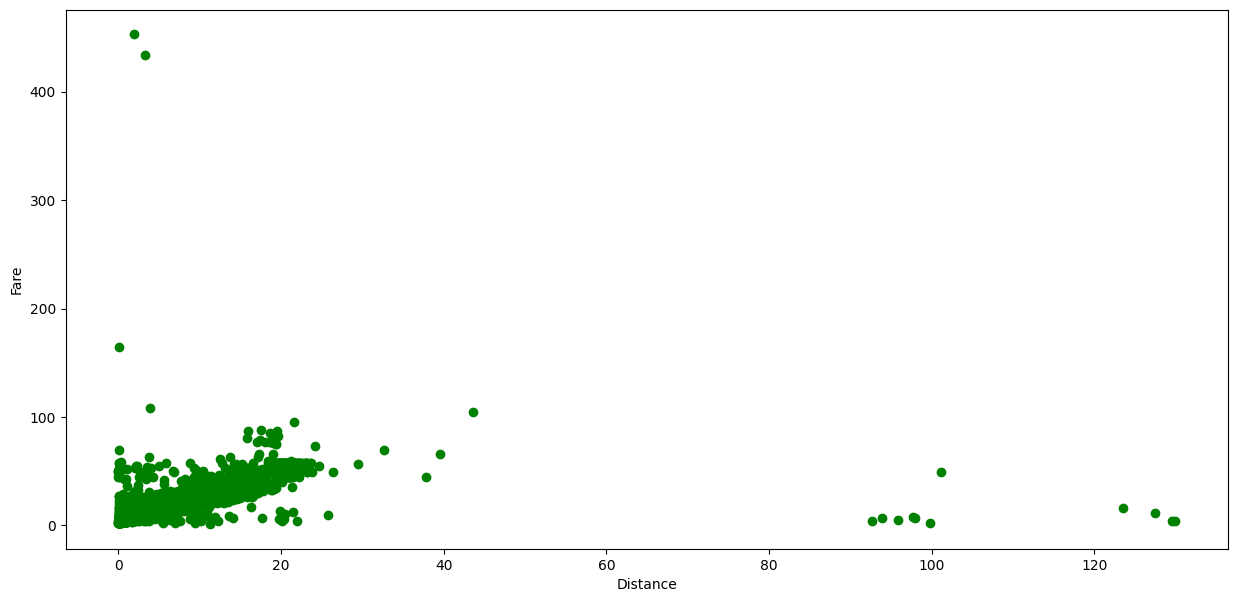

In [123]:
#Relationship between distance and fare 

plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

OBSERVATIONS

It is quite obvious that distance will effect the amount of fare.

## FEATURE SCALING

fare_amount


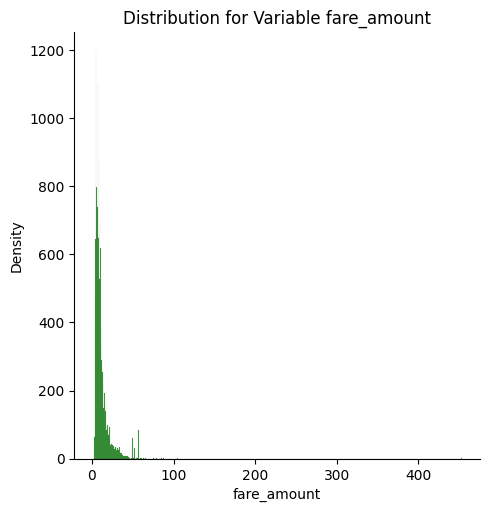

distance


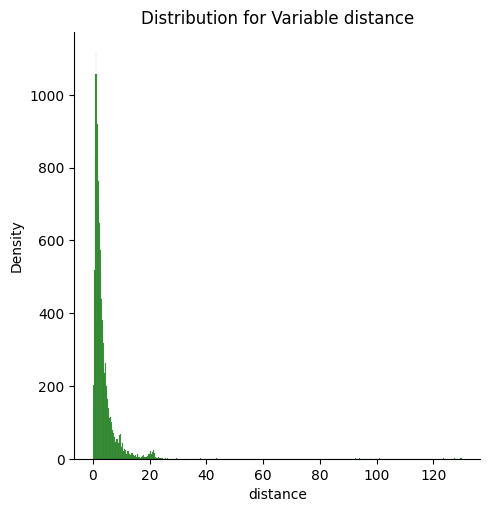

In [127]:
#Normality check of training data is uniformly distributed or not.

for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [128]:
# Since skewness of target variable(fare_amount) is high, apply log transform to reduce the skewness

train['fare_amount'] = np.log1p(train['fare_amount'])

In [129]:
# Since skewness of distance variable is high, apply log transform to reduce the skewness

train['distance'] = np.log1p(train['distance'])

fare_amount


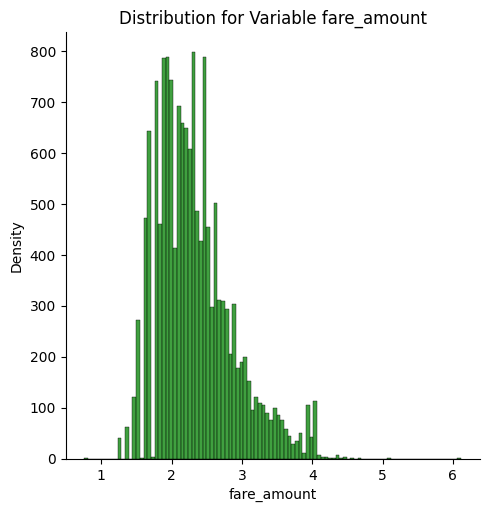

distance


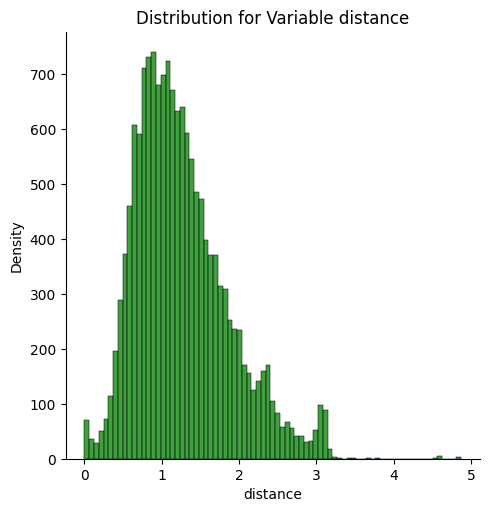

In [130]:
# Normality to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

OBSERVATIONS

- Here, we can see bell shaped distribution.
- Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique i.e, Normalization or Standarization for our training data.

In [131]:
test1= test.copy()

## APPLYING ML MODEL

In [132]:
# train test split for further modelling

x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [133]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


LINEAR REGRESSION MODEL

In [134]:
# Building model on top of training dataset

model = LinearRegression().fit(x_train , y_train)

In [135]:
# Prediction on train data

pred_train_LR = model.predict(x_train)

In [136]:
# Prediction on test data

pred_test_LR= model.predict(x_test)

In [137]:
# RMSE for train data

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [138]:
# RMSE for test data

RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [139]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 0.2753110017967313
Root Mean Squared Error for Test data = 0.24540661786977683


In [140]:
# Calculate R_square for train data

from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.7495502651880406

In [141]:
r2_score(y_test, pred_test_LR)

0.7827019104296609

DECISION TREE MODEL

In [143]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [144]:
# Prediction on train data

pred_train_DT = DT_MODEL.predict(x_train)



# Prediction on test data

pred_test_DT = DT_MODEL.predict(x_test)

In [145]:
# Calculating RMSE for train data

RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))



# Calculating RMSE for test data

RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [146]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

Root Mean Squared Error for Train data = 0.29962109020770195
Root Mean Squared Error for Test data = 0.2867460617158617


In [147]:
# R_square calculation for train data

r2_score(y_train, pred_train_DT)

0.7033678616157002

In [148]:
# R_square calculation for test data

r2_score(y_test, pred_test_DT)


0.7033268167661033

RANDOM FOREST MODEL

In [149]:
RF_MODEL = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [150]:
# Prediction on train data

pred_train_RF = RF_MODEL.predict(x_train)

# Prediction on test data

pred_test_RF = RF_MODEL.predict(x_test)

In [151]:
# Calculating RMSE for train data

RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

# Calculating RMSE for test data

RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [152]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_RF))

Root Mean Squared Error for Train data = 0.09596498978612455
Root Mean Squared Error for Test data = 0.23470133376043514


In [153]:
# Calculate R_square for train data

r2_score(y_train, pred_train_RF)

0.9695702008701547

In [154]:
# Calculate R_square for test data

r2_score(y_test, pred_test_RF)

0.801246638280555

GRADIENT BOOSTING

In [155]:
GB_MODEL = GradientBoostingRegressor().fit(x_train, y_train)

In [156]:
# Prediction on train data

pred_train_GB = GB_MODEL.predict(x_train)



# Prediction on test data

pred_test_GB = GB_MODEL.predict(x_test)

In [157]:
# RMSE for train data

RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))


# RMSE for test data

RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [158]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

Root Mean Squared Error for Train data = 0.22754316149645537
Root Mean Squared Error for Test data = 0.22755915125992246


In [159]:
# Calculate R_square for train data

r2_score(y_train, pred_train_GB)

0.8289193000175024

In [160]:
# Calculate R_square for test data

r2_score(y_test, pred_test_GB)

0.8131590880331183

OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)

In [161]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Haperparameter Grid

In [162]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [163]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_rf = randomcv_rf.fit(x_train,y_train)
prediction_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)

In [164]:
# R_square

RRF_r2 = r2_score(y_test, predictions_RRF)

In [165]:
# Calculating RMSE

RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

In [166]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.2373410611350033


In [167]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [168]:
# Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [169]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_gb = randomcv_gb.predict(x_test)


view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

In [170]:
# R_square

gb_r2 = r2_score(y_test, predictions_gb)


# Calculating RMSE

gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

In [171]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25226513358657066


In [172]:
from sklearn.model_selection import GridSearchCV  

# Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [173]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [188]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [175]:
#Apply model on test data

predictions_GRF = gridcv_rf.predict(x_test)


In [176]:
# R_square

GRF_r2 = r2_score(y_test, predictions_GRF)

In [178]:
# Calculating RMSE

GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [179]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 15}
R-squared = 0.8.
RMSE =  0.23711854543717428


In [180]:
# Grid Search CV for gradinet boosting

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [181]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [182]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)

gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [186]:
# Apply model on test data

predictions_Ggb = gridcv_gb.predict(x_test)

In [185]:
# R_square

Ggb_r2 = r2_score(y_test, predictions_Ggb)

In [189]:
# Calculating RMSE

Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

In [190]:
print('Grid Search CV Gradient Boosting regression Model Performance:')

print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.23724212611002213


**FARE PREDICTION** (from cleaned and processed test dataset)
- We already have cleaned and processed test and training dataset.
- Hence, we will be predicting using grid search CV for **Random Forest Model.**

In [191]:
# Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [192]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [193]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [194]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [195]:
#Apply model on test data

predictions_GRF_test = gridcv_rf.predict(test)

predictions_GRF_test

array([3.41553479, 3.52430917, 1.82092183, ..., 1.86325424, 2.99980762,
       2.31186247])

In [196]:
test['Predicted_fare'] = predictions_GRF_test

In [198]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,3.415535
1,1,2015,1,27,1,13,2.425353,3.524309
2,1,2011,10,8,5,11,0.618628,1.820922
3,1,2012,12,1,5,21,1.961033,2.886221
4,1,2012,12,1,5,21,5.387301,1.836561


In [200]:
test.to_csv('test.csv')